In [5]:
#Siddharth Vadgama
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [12]:
print(os.listdir("../input/chest-xray-pneumonia"))
main_dir = os.listdir('../input/chest-xray-pneumonia/chest_xray')
train_dir= '../input/chest-xray-pneumonia/chest_xray/train/'
val_dir = '../input/chest-xray-pneumonia/chest_xray/val/'
test_dir = '../input/chest-xray-pneumonia/chest_xray/test/'
train_n = train_dir+'NORMAL/'
train_p = train_dir+'PNEUMONIA/'

['chest_xray']


normal picture title:  IM-0484-0001.jpeg
pneumonia picture title: person629_virus_1207.jpeg


Text(0.5, 1.0, 'Pneumonia')

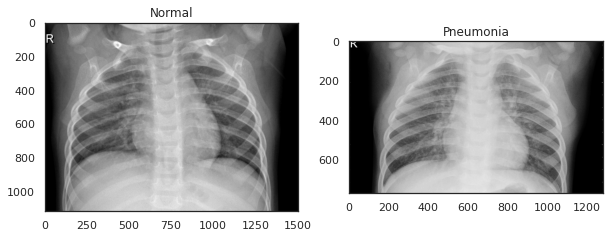

In [20]:
#Compare Images
total_norm_pics=len(os.listdir(train_n))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic

rand_p = np.random.randint(0,len(os.listdir(train_p)))
sick_pic =  os.listdir(train_p)[rand_norm]
sick_address = train_p+sick_pic
print('pneumonia picture title:', sick_pic)

norm_load = Image.open(norm_pic_address)
sick_load = Image.open(sick_address)


f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load,cmap='gray', vmin=0, vmax=255)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sick_load,cmap='gray', vmin=0, vmax=255)
a2.set_title('Pneumonia')

In [24]:
'''
CNN Setup
'''
convo=Sequential()
#1st layer of the network
convo.add(Conv2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
convo.add(MaxPool2D(pool_size=(2,2)))
#2nd layer of the network
convo.add(Conv2D(32,(3,3),activation="relu"))
convo.add(MaxPool2D(pool_size = (2,2)))
convo.add(Flatten())
#Dense Layer
convo.add(Dense(activation = 'relu', units = 128))
convo.add(Dense(activation = 'sigmoid', units = 1))
#Compilation
convo.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [29]:
#Feeding Images to CNN
num_test=600
batch=32
train_data_gen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_data_gen = ImageDataGenerator(rescale = 1./255)

training_set=train_data_gen.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode='binary')
test_set=test_data_gen.flow_from_directory(test_dir,target_size=(64,64),batch_size=32,class_mode='binary')
val_gen=test_data_gen.flow_from_directory(val_dir,target_size=(64,64),batch_size=32,class_mode='binary')
cnn_model=convo.fit_generator(training_set,steps_per_epoch= 164,epochs=2,validation_data=val_gen,validation_steps=624)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/2
164/164 [==============================] - 473s 3s/step - loss: 0.2394 - accuracy: 0.8992 - val_loss: 0.6000 - val_accuracy: 0.6875
Epoch 2/2
164/164 [==============================] - 462s 3s/step - loss: 0.2095 - accuracy: 0.9163 - val_loss: 0.3350 - val_accuracy: 0.8125


In [27]:
convo.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [31]:
test_accuracy = convo.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_accuracy[1]*100, '%')



The testing accuracy is : 87.36134171485901 %


NameError: name 'cnn' is not defined

KeyError: 'acc'